In [1]:
import talib
import numpy as np
from matplotlib import pyplot as plt
from exchange.board import *
from matplotlib import pyplot as plt

In [2]:
root_path = '../DATA/BB/10/'

In [3]:
history = load_directory(root_path + 'BB-2020-10-01T0*.log.gz')
print(len(history.dollar_bar))

history.dollar_bar

chop too short 2020-10-01 01:53:41.473000 2020-10-01 02:05:41.473000
1.0833380222320557 ../DATA/BB/10/BB-2020-10-01T00-09-41.084127Z.log.gz ../DATA/BB/10/BB-2020-10-01T01-00-58.670877Z.log.gz
chop too short 2020-10-01 01:19:35.593000 2020-10-01 01:31:35.593000
chop too short 2020-10-01 02:24:30.914000 2020-10-01 02:36:30.914000
chop too short 2020-10-01 02:39:38.712000 2020-10-01 02:51:38.712000
1.6888298988342285 ../DATA/BB/10/BB-2020-10-01T01-00-58.670877Z.log.gz ../DATA/BB/10/BB-2020-10-01T01-53-02.064144Z.log.gz
merged 0.013637781143188477
chop too short 2020-10-01 02:24:10.051000 2020-10-01 02:36:10.051000
chop too short 2020-10-01 03:35:02.251000 2020-10-01 03:47:02.251000
1.9060521125793457 ../DATA/BB/10/BB-2020-10-01T01-53-02.064144Z.log.gz ../DATA/BB/10/BB-2020-10-01T02-44-49.406307Z.log.gz
merged 0.019359827041625977
chop too short 2020-10-01 03:41:25.695000 2020-10-01 03:53:25.695000
chop too short 2020-10-01 04:18:13.139000 2020-10-01 04:30:13.139000
2.175997018814087 ../DA

,time_stamp,open,close,high,low,sell_volume,buy_volume,bs_ratio,market_buy,market_sell,limit_buy,limit_sell,q_market_buy,q_market_sell,q_limit_buy,q_limit_sell
0,2020-10-01 00:13:03.634,10794.0,10792.0,10794.0,10792.0,3.387,1.300,0.277363,10792.5,10792.0,10792.0,NaN,3.0,6.0,3.5,NaN
1,2020-10-01 00:15:45.012,10792.0,10796.0,10796.0,10792.0,1.560,3.504,0.691943,10796.0,10795.5,NaN,NaN,-4.0,9.5,NaN,NaN
2,2020-10-01 00:17:46.406,10796.0,10791.5,10798.5,10791.5,3.308,1.527,0.315822,10792.0,10791.5,NaN,10792.0,-2.0,5.5,NaN,6.0
3,2020-10-01 00:18:24.453,10791.5,10785.5,10791.5,10785.5,5.120,0.000,0.000000,10786.0,10785.5,NaN,NaN,4.0,-3.5,NaN,NaN
4,2020-10-01 00:22:37.969,10785.5,10789.5,10789.5,10785.5,2.980,1.855,0.383661,10789.5,10789.0,10789.0,NaN,0.5,-1.5,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2020-10-01 10:21:27.321,10853.5,10853.5,10853.5,10853.5,5.060,0.000,0.000000,10854.0,10853.5,NaN,NaN,-0.5,6.0,NaN,NaN
373,2020-10-01 10:21:27.323,10853.5,10853.5,10853.5,10853.5,5.814,0.000,0.000000,10854.0,10853.5,NaN,NaN,-0.5,6.0,NaN,NaN
374,2020-10-01 10:21:27.389,10853.5,10850.0,10853.5,10850.0,3.966,0.000,0.000000,10854.0,10853.5,NaN,NaN,-6.5,6.0,NaN,NaN
375,2020-10-01 10:22:30.580,10850.0,10847.0,10850.0,10847.0,7.504,0.000,0.000000,10847.5,10847.0,NaN,10847.5,-0.5,-0.5,NaN,0.0


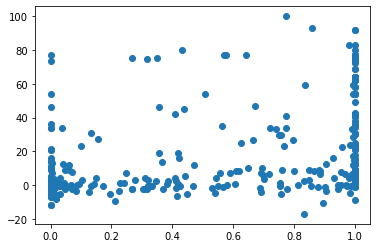

In [4]:
df = history.dollar_bar
plt.scatter(df['bs_ratio'], df['q_market_buy'])

In [7]:
from minepy import MINE

m = MINE()
m.compute_score(df['bs_ratio'], df['q_market_buy'])
print(m.mic())

print(df[['bs_ratio', 'q_market_buy', 'q_market_sell']].corr())



0.30085039718998463
               bs_ratio  q_market_buy  q_market_sell
bs_ratio       1.000000      0.413208       0.162416
q_market_buy   0.413208      1.000000       0.240686
q_market_sell  0.162416      0.240686       1.000000


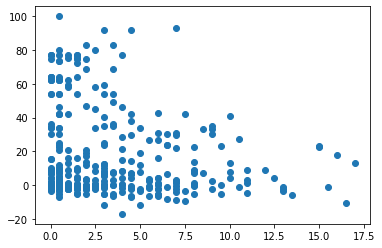

0.2162647041943756

In [7]:
plt.scatter(df['high']-df['low'], df['q_market_buy'])
plt.show()

m.compute_score(df['high']-df['low'], df['q_market_buy'])
m.mic()


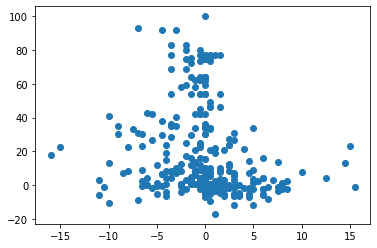

In [8]:
plt.scatter(df['open']-df['close'], df['q_market_buy'])
plt.show()

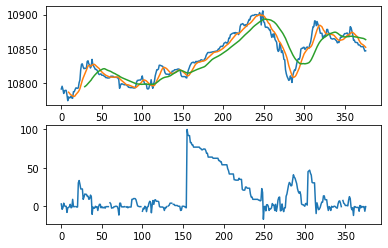

0.28422850593566834


In [10]:
import talib
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

close = df['close'].copy()

sma10 = talib.SMA(close, timeperiod=10)
sma30 = talib.SMA(close, timeperiod=30)

ax1.plot(close)
ax1.plot(sma10)
ax1.plot(sma30)
ax2.plot(df['q_market_buy'])
plt.show()

m.compute_score(sma10, df['q_market_buy'])
print(m.mic())



In [12]:
m.compute_score(sma30, df['q_market_buy'])
print(m.mic())

0.43877905812549267


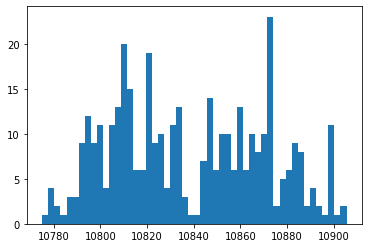

In [13]:
plt.hist(close, bins=50)
plt.show()